In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('framingham2.csv')

In [4]:
dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values

In [6]:
X

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  48.  ,   2.  , ...,  22.  ,  84.  ,  86.  ],
       [  0.  ,  44.  ,   1.  , ...,  19.16,  86.  ,    nan],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [9]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:, 1:])
X[:,1:] = imputer.transform(X[:,1:])
X

array([[  1.        ,  39.        ,   4.        , ...,  26.97      ,
         80.        ,  77.        ],
       [  0.        ,  46.        ,   2.        , ...,  28.73      ,
         95.        ,  76.        ],
       [  1.        ,  48.        ,   1.        , ...,  25.34      ,
         75.        ,  70.        ],
       ...,
       [  0.        ,  48.        ,   2.        , ...,  22.        ,
         84.        ,  86.        ],
       [  0.        ,  44.        ,   1.        , ...,  19.16      ,
         86.        ,  81.96675325],
       [  0.        ,  52.        ,   2.        , ...,  21.47      ,
         80.        , 107.        ]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 , random_state = 0)

In [13]:
X_train

array([[ 0.  , 51.  ,  2.  , ..., 26.65, 70.  , 79.  ],
       [ 1.  , 46.  ,  1.  , ..., 27.17, 65.  , 82.  ],
       [ 0.  , 60.  ,  1.  , ..., 23.27, 92.  , 79.  ],
       ...,
       [ 1.  , 39.  ,  3.  , ..., 24.47, 70.  , 81.  ],
       [ 0.  , 57.  ,  1.  , ..., 24.27, 75.  , 81.  ],
       [ 0.  , 40.  ,  2.  , ..., 26.56, 75.  , 73.  ]])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
X_train_scaled

array([[-0.86437085,  0.16730805,  0.01893952, ...,  0.20510692,
        -0.49235312, -0.1320056 ],
       [ 1.15691083, -0.41554992, -0.97001849, ...,  0.33236491,
        -0.90679691, -0.00301486],
       [-0.86437085,  1.21645238, -0.97001849, ..., -0.62206997,
         1.33119957, -0.1320056 ],
       ...,
       [ 1.15691083, -1.23155107,  1.00789754, ..., -0.3283977 ,
        -0.49235312, -0.04601177],
       [-0.86437085,  0.86673761, -0.97001849, ..., -0.37734308,
        -0.07790932, -0.04601177],
       [-0.86437085, -1.11497947,  0.01893952, ...,  0.1830815 ,
        -0.07790932, -0.38998709]])

In [16]:
X_train.shape

(3814, 15)

In [17]:
X_test.shape

(424, 15)

In [18]:
X_dev = X_train_scaled[0:424]
y_dev = y_train[0:424]
X_train_scaled = X_train_scaled[424:3814]
y_train = y_train[424:3814]

In [19]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [20]:
def cost(w,b,X,y,lambda_):
    m = X.shape[0]
    error = 0
    epsilon = 1e-15
    for i in range(m):
        f = sigmoid(np.dot(w,X[i]) + b)
        f = np.clip(f,epsilon,1-epsilon)
        error += y[i]*np.log(f) + (1-y[i])*np.log(1-f)

    reg_cost = (lambda_/(2*m)) * np.sum(np.square(w))
    J = (-error/m) + reg_cost
    return J
    

In [21]:
def derivatives(w,b,X,y,lambda_):
    wder = np.zeros(X.shape[1])
    bder = 0
    m = X.shape[0]
    for i in range(m):
        f = sigmoid(np.dot(w,X[i]) + b)
        wder += (f-y[i])*X[i]
        bder += (f-y[i])
        
    wder/=m
    bder/=m
    reg_der = ((lambda_/m)*w)
    wder += reg_der

    return wder,bder

In [22]:
def gradient_descent(w,b,X,y,alpha,lambda_):
    wder,bder = derivatives(w,b,X,y,lambda_)
    temp_w = w - alpha*wder
    temp_b = b - alpha*bder

    w = temp_w
    b = temp_b

    return w,b

In [122]:
def train(X,y):
    alpha = 0.5
    lambda_ = 1
    epochs = 1000
    w = np.zeros(X.shape[1])
    b = 0
    J = cost(w,b,X,y,lambda_)
    for i in range(epochs):
        w,b = gradient_descent(w,b,X,y,alpha,lambda_)
        J = cost(w,b,X,y,lambda_)
        print(f'The values of w and b after {i} epochs is {w} and {b} respectively')
        print()
        print(f'The cost after {i} epochs is {J}')
        print()

    print()
    print(f'Values of w and b after training the model is {w} and {b} respectively')

    return w,b
    
        
    

In [123]:
w,b = train(X_train_scaled,y_train)

The values of w and b after 0 epochs is [ 0.01474464  0.04006076 -0.01073668  0.00401873  0.01253158  0.01465672
  0.01115747  0.03215842  0.01769933  0.01351293  0.03668392  0.02331463
  0.01371072  0.00428518  0.02052602] and -0.17536873156342184 respectively

The cost after 0 epochs is 0.6246402250782571

The values of w and b after 1 epochs is [ 0.02727293  0.07020814 -0.01749559  0.00908955  0.02462039  0.02354155
  0.01963217  0.05207909  0.02986746  0.02177246  0.05980778  0.03493632
  0.02031409  0.00561077  0.03532532] and -0.3289195036903798 respectively

The cost after 1 epochs is 0.5752433550037729

The values of w and b after 2 epochs is [ 0.03793893  0.09410111 -0.0218139   0.01412258  0.03568993  0.02896795
  0.02632501  0.06485174  0.03842561  0.02701338  0.07503782  0.03998065
  0.02304202  0.0053773   0.04637856] and -0.4638713706323122 respectively

The cost after 2 epochs is 0.5381689417223157

The values of w and b after 3 epochs is [ 0.04711893  0.11400037 -0.0246

In [124]:
def errors(w,b,X,y):
    m = X.shape[0]
    error = 0
    epsilon = 1e-15
    for i in range(m):
        f = sigmoid(np.dot(w,X[i]) + b)
        f = np.clip(f,epsilon,1-epsilon)
        error += y[i]*np.log(f) + (1-y[i])*np.log(1-f)

    J = -error/m
    return J

In [125]:
def predictor(w,b,X,y):
    y_hat = []
    m = X.shape[0]
    for i in range(m):
        f = sigmoid(np.dot(w,X[i]) + b)
        if f>=0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)

    y_hat = np.array(y_hat)
    return y_hat

In [126]:
y_hat = predictor(w,b,X_test_scaled,y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

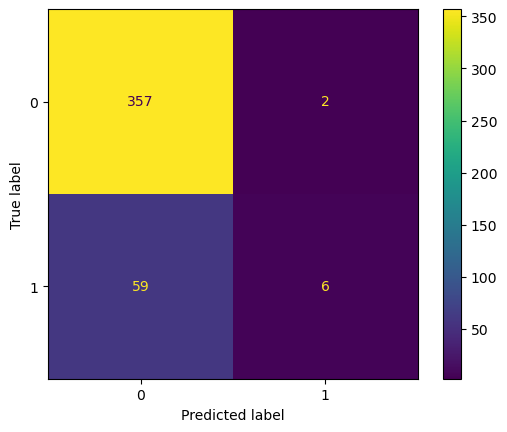

In [127]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show

In [128]:
X_dev_scaled = scaler.fit_transform(X_dev)

In [129]:
y_hatdev = predictor(w,b,X_dev_scaled,y_dev)

<function matplotlib.pyplot.show(close=None, block=None)>

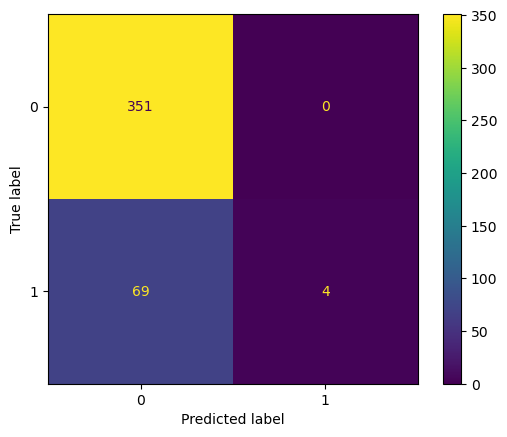

In [130]:
confusion_matrix = metrics.confusion_matrix(y_dev,y_hatdev)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show

In [131]:
train_error = errors(w,b,X_train_scaled,y_train)
test_error = errors(w,b,X_test_scaled,y_test)
dev_error = errors(w,b,X_dev_scaled,y_dev)

In [132]:
train_error

0.37542992721572666

In [133]:
test_error

0.38311175634406

In [134]:
dev_error

0.40543462748215453

In [135]:
m_test = y_test.shape[0]

In [136]:
m_dev = y_dev.shape[0]

In [137]:
c=0
for i in range(m_test):
    if y_hat[i] != y_test[i]:
        c+=1

test_misclassified = (c/m_test)*100
print(f'Percentage of test set misclassified = {test_misclassified}')
        

Percentage of test set misclassified = 14.38679245283019


In [138]:
c=0
for i in range(m_dev):
    if y_hatdev[i] != y_dev[i]:
        c+=1

dev_misclassified = (c/m_dev)*100
print(f'Percentage of dev set misclassified = {dev_misclassified}')
        

Percentage of dev set misclassified = 16.27358490566038


In [143]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat) * 100 
print(f"Accuracy of the model: {accuracy:.2f}%")

Accuracy of the model: 85.61%


In [144]:
accuracy = accuracy_score(y_dev, y_hatdev) * 100 
print(f"Accuracy of the model: {accuracy:.2f}%")

Accuracy of the model: 83.73%
